In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
 df = pd.read_csv('data/telecom_churn.csv')

In [28]:
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [27]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


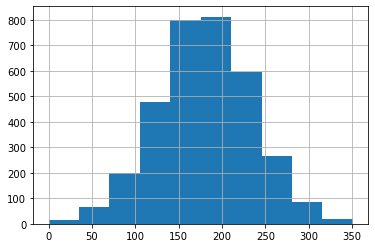

In [22]:
df['total day minutes'].hist();


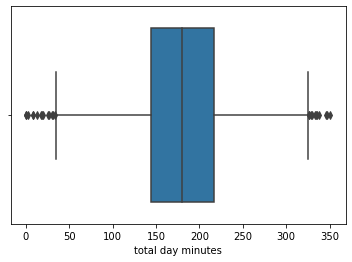

In [24]:
sns.boxplot(x=df['total day minutes']);

In [29]:
df['state'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OR     78
Name: state, dtype: int64

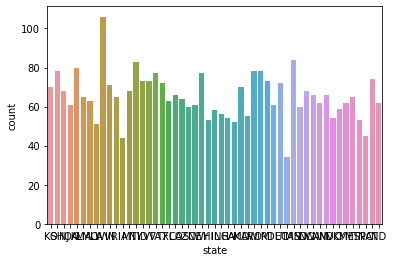

In [32]:
sns.countplot(x=df['state'])

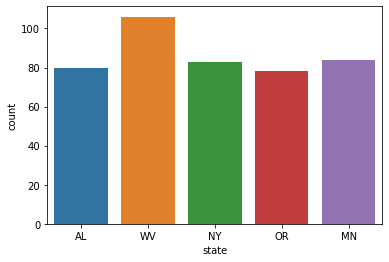

In [38]:
sns.countplot(x=df[df['state'].isin(df['state'].value_counts().head().index)]['state'])

# Взамиодействие
# Кол-кол

In [45]:
feat = [f for f in df.columns if 'charge' in f]
feat

['total day charge',
 'total eve charge',
 'total night charge',
 'total intl charge']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C17956A88>,
      dtype=object)

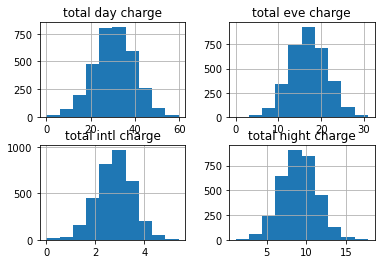

In [46]:
df[feat].hist()


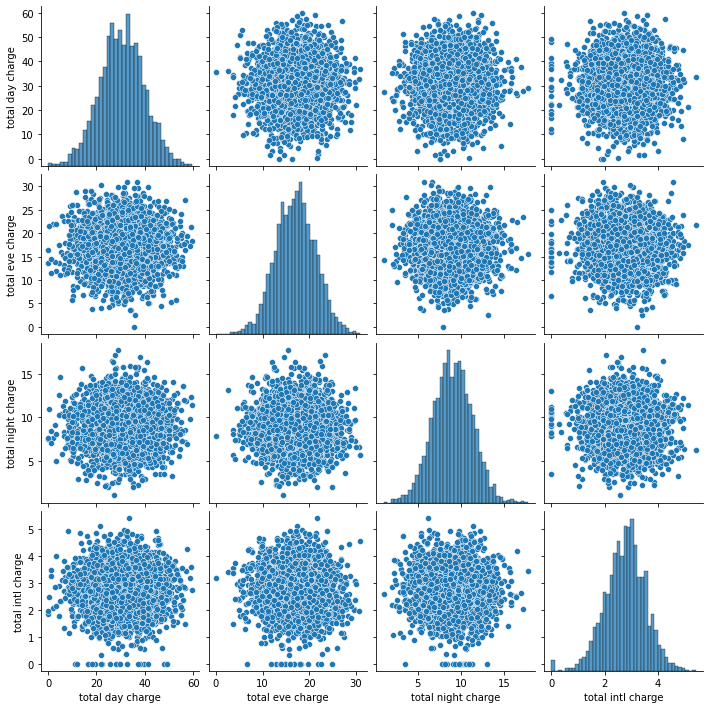

In [47]:
sns.pairplot(df[feat])

In [60]:
df['churn'].map({False:'blue', True:'orange'})

0       blue
1       blue
2       blue
3       blue
4       blue
        ... 
3328    blue
3329    blue
3330    blue
3331    blue
3332    blue
Name: churn, Length: 3333, dtype: object

Text(0, 0.5, 'межнар.нач')

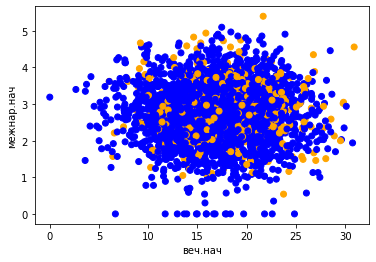

In [67]:
plt.scatter(df['total eve charge'],df['total intl charge'], color=df['churn'].map({False:'blue', True:'orange'}),
           label='xyz');
plt.xlabel('веч.нач')
plt.ylabel('межнар.нач')


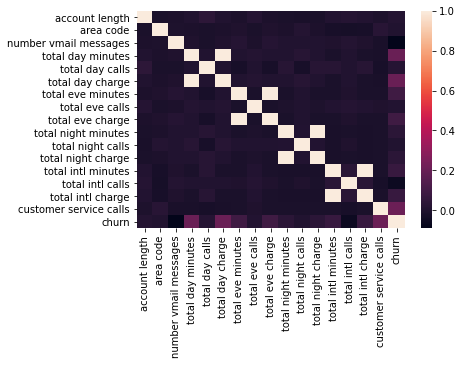

In [69]:
sns.heatmap(df.corr());

In [74]:
#удаление колонок
df.drop(feat,axis=1, inplace=True)


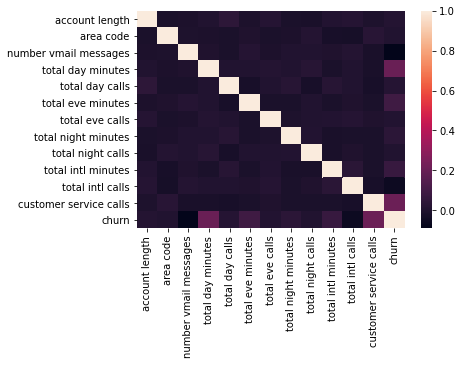

In [75]:
sns.heatmap(df.corr());

# Колич-кат+ коли+бинар

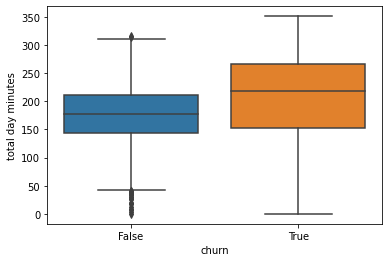

In [81]:
sns.boxplot(x='churn', y='total day minutes', data=df)

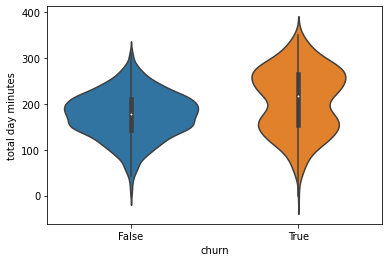

In [82]:
sns.violinplot(x='churn', y='total day minutes', data=df)

In [88]:
df.groupby('international plan')['total day minutes'].mean()

international plan
no     178.893887
yes    187.986997
Name: total day minutes, dtype: float64

# Категориальные с категорильаными


In [90]:
pd.crosstab(df['churn'],df['international plan'])

international plan,no,yes
churn,,
False,2664,186
True,346,137


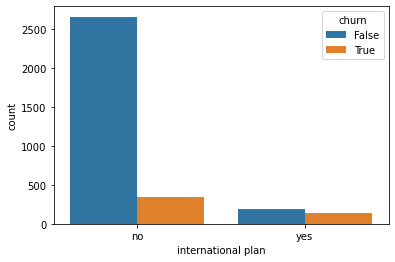

In [93]:
sns.countplot(x=df['international plan'],hue='churn',data=df)

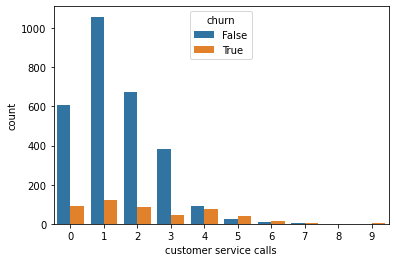

In [94]:
sns.countplot(x=df['customer service calls'],hue='churn',data=df)

In [95]:
from sklearn.manifold import TSNE

In [96]:
tsne = TSNE(random_state=0)

In [100]:
df2 =  df.drop('state',axis=1)

In [103]:
df2['international plan'] = df2['international plan'].map({'yes':1,'no':0})

In [104]:
df2['voice mail plan'] = df2['voice mail plan'].map({'yes':1,'no':0})

In [108]:
df2.drop(['phone number'],axis=1, inplace=True)

In [110]:
df2


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False
3329,68,415,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
3330,28,510,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False
3331,184,510,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False


In [111]:
tsne.fit(df2)

TSNE(random_state=0)

In [113]:
tsne_repr = tsne.trans

AttributeError: 'TSNE' object has no attribute 'trans'

In [114]:
tsne.fit_transform(df2)


array([[-60.395523  ,   0.08698811],
       [-11.931608  , -13.768264  ],
       [-44.32137   , -18.95231   ],
       ...,
       [ 74.573586  ,   1.7684162 ],
       [ 69.35252   , -13.717108  ],
       [-52.1727    ,   4.727994  ]], dtype=float32)

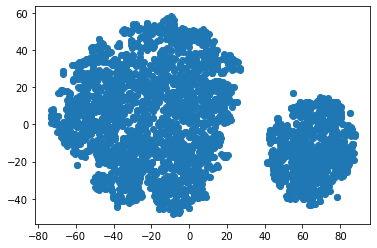

In [115]:
plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])